# 4장. 구조적 API 개요

- 구조적 API에는 3가지 분산 컬렉션 API가 존재

1. Dataset
2. DataFrame
3. SQL 테이블과 뷰

- **배치**와 **스트리밍** 처리에서 구조적 API 활용 가능하며 손쉽게 서로 바꿀 수 있음


#### 반드시 알아야할 개념

- 타입형, 비타입형 API의 개념과 차이점
- 핵심 용어
- 스파크가 구조적 API의 데이터 흐름을 해석하고 클러스터에서 실행하는 방식

### 4.3.1. Dataset vs DataFrame

- Dataset은 타입형, 컴파일 타임에서 타입 확인
- DataFrame은 비타입형, 런타임에서 타입 확인
- 스파크의 DataFrame은 Row 타입으로 구성된 Dataset, 연산에 최적화된 인메모리 포맷 

In [2]:
spark

In [4]:
# 스파크에서 Row(로우) 생성
spark.range(2).collect()

[Row(id=0), Row(id=1)]

### 4.3.4. 스파크 데이터 타입

In [5]:
from pyspark.sql.types import *
b = ByteType()

In [6]:
b

ByteType



Data type | Value type in Python | API to access or create a data type
:--: |:--| :--
ByteType | int or longNote: Numbers will be converted to 1-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -128 to 127. | ByteType()
ShortType | int or longNote: Numbers will be converted to 2-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -32768 to 32767. | ShortType()
IntegerType | int or long | IntegerType()
LongType | longNote: Numbers will be converted to 8-byte signed integer numbers at runtime. Please make sure that numbers are within the range of -9223372036854775808 to 9223372036854775807.Otherwise, please convert data to decimal.Decimal and use DecimalType. | LongType()
FloatType | floatNote: Numbers will be converted to 4-byte single-precision floating point numbers at runtime. | FloatType()
DoubleType | float | DoubleType()
DecimalType | decimal.Decimal | DecimalType()
StringType | string | StringType()
BinaryType | bytearray | BinaryType()
BooleanType | bool | BooleanType()
TimestampType | datetime.datetime | TimestampType()
DateType | datetime.date | DateType()
ArrayType | list, tuple, or array | ArrayType(elementType, [containsNull])Note:The default value of containsNull is True.
MapType | dict | MapType(keyType, valueType, [valueContainsNull])Note:The default value of valueContainsNull is True.
StructType | list or tuple | StructType(fields)Note: fields is a Seq of StructFields. Also, two fields with the same name are not allowed.
StructField | The value type in Python of the data type of this field(For example, Int for a StructField with the data type IntegerType) | StructField(name, dataType, [nullable])Note: The default value of nullable is True.

https://spark.apache.org/docs/latest/sql-ref-datatypes.html

### 4.4 구조적 API의 실행 과정

1. 구조적 API를 이용해 코드를 작성합니다.
2. 스파크가 논리적 실행 계획으로 변환합니다. - 분석기를 활용
3. 스파크는 논리적 실행 계획을 물리적 실행 계획으로 변화하며 그 과정에서 추가적인 최적화를 할 수 있는지 확인합니다. - 컴파일 과정
4. 스파크는 이 물리적 실행 계획을 클러스터에서 실행합니다.


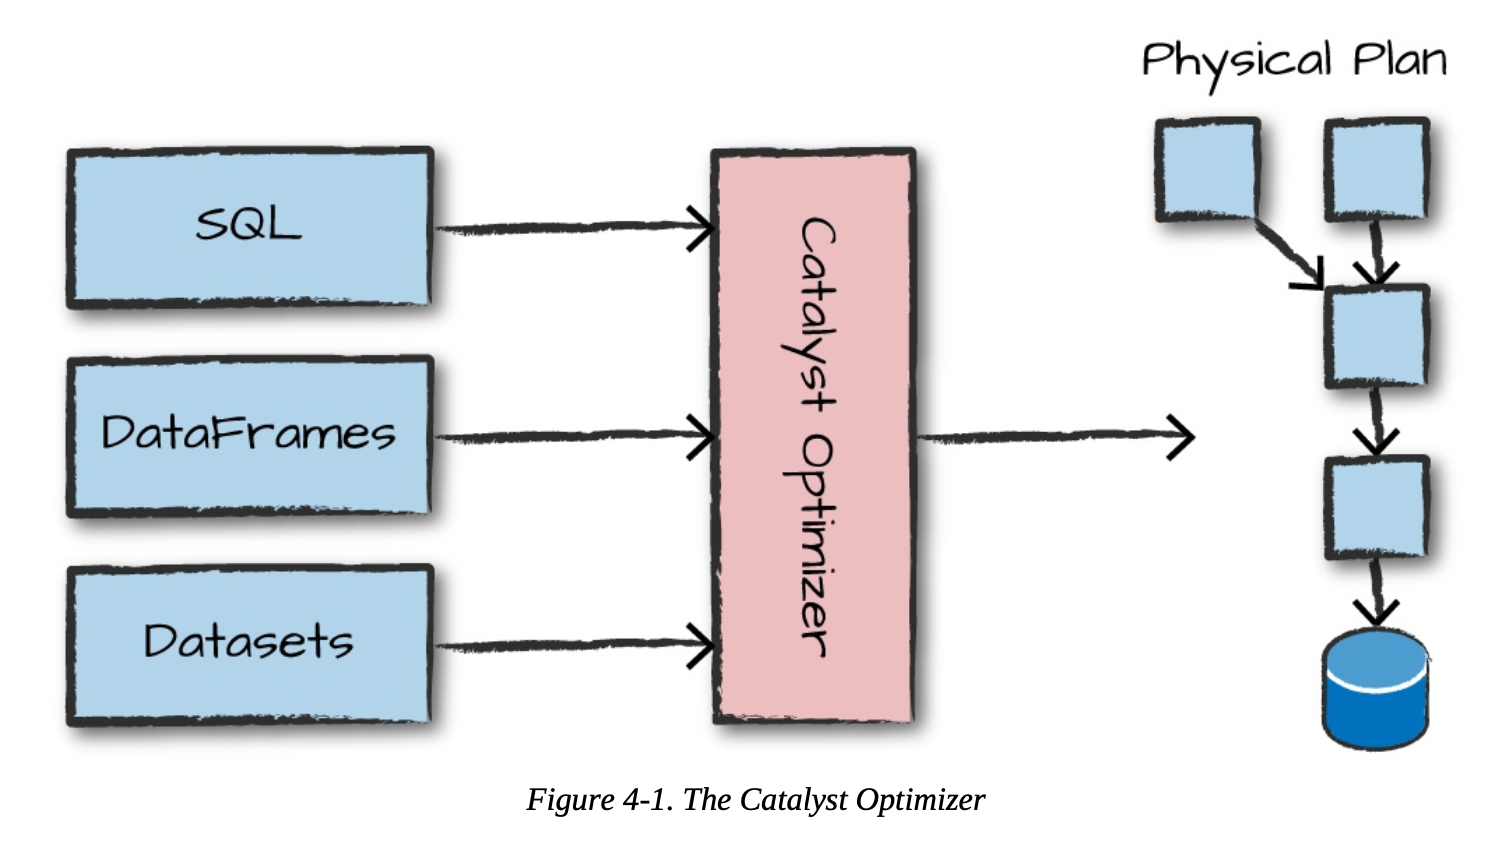